# Project Proposal: Group 34

# Study on the Effects of Financial Support on Student Academic Performance

In [42]:
#Load necessary packages for the project proposal
library(tidyverse)
library(repr)
library(infer)
library(cowplot)

# 1. Introduction

The dataset that we have chosen is related to student performance and can be found at: https://archive.ics.uci.edu/ml/datasets/Student+Performance. The data was collected from two Portuguese secondary schools using school reports and questionnaires. 
 
Our research question for this project is how is a student’s academic performance affected by whether or not they receive financial aid, such as taking out student loans? Our random variable of interest is the students’ final grades (G3) spread across the two categories of students who have extra financial aid and those who don’t. **"extra_edu_support" will be our variable representing whether or not a student received fincial aid.** Our location parameter will be the mean of the final grades, since we want to compare the averages of the two categories. We will use standard deviation as the scale parameter to measure and evaluate the accuracy and precision of our sampling distribution. 
 
There is currently a divide in scholarly discourse on this topic. Facer (n.d.) concluded in her research paper that “using student loans has a significant negative effect on academic performance, decreasing GPA by about 0.19 points” (p.1). In contrast, Dynarski (2019) asserted that students who accessed financial aid were more likely to graduate, had higher academic performance, and landed more successful careers after graduation. Finally, Huang et al. (2017) stated that student loans do not have any measurable effect on academic performance.   Because of this conflict in findings, we are interested in conducting our own research on a topic that is particularly relevant to us as university students. 


# 2. Methodology

For this study, we will use the method of hypothesis testing with 95% confidence interval to find out if a significant difference exists between the students with financial support and those who without. Our study will compose of five parts, namely **data cleaning, sampling, calculation of sample statistics (in the form of a table), construction of 95% confidence interval, and visualization.**  
**Notes:**  
**1. Sampling:**  
As we can see a large difference between the number of students with support (50) as opposed to without (307), we scaled down the student without support set, in order to have same numbers of observations for both samples. The reason we decide to scale down the "without support" set is to allow us run the bootstrap sampling with more replicates which in turn would give us normal shape sampling distributions.  
**2. Comments on School Variable:**  
As the observations from two samples drawn come from students taking math courses in two different schools, there are valid concerns such that there exists significant difference between the average performances of students from two schools. Thus, we choose to address this concern by comparing their statistics and sample distribution (based on the school variable).


# 3. Preliminary Data Analysis & Results

## Data Importing & Cleaning

In [43]:
#Load data into R frame, note that the dataset below only applies to the math course
student_data_original <- read_delim(file = "https://raw.githubusercontent.com/czhang176/dsci100_groupproject/main/student-mat.csv",
                           delim = ";") 

#Filter out columns other than G1, G2, G3, and schoolsup, then filter out the NA rows if applicable, also add in 
#final_grade_by_percent to represent students overall performance on the course
#extra_edu_support represents the Financial Aid Variable (schoolsup)
student_data_clean <- student_data_original %>%
                      select(school, G1, G2, G3, schoolsup) %>%
                      filter(G1 != is.na(G1) & G2 != is.na(G2) & G3 != is.na(G3) & schoolsup != is.na(schoolsup)) %>%
                      mutate(final_grade_by_percent = (G3) / 20 * 100) %>%
                      rename(period_1_grade = G1, period_2_grade = G2, final_grade = G3, extra_edu_support = schoolsup)


Rows: 395 Columns: 33

── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



## Bootstrap Samples for students with financial aid and without financial aid

In [44]:
set.seed(8622) # To ensure the result produced is reproducible on everytime

#First split the data into with financial aid & without financial aideducational support
students_with_support <- student_data_clean %>%
                         filter(extra_edu_support == "yes")

# Samples have the same size sure to ensure results are valid and the statistical estimates will be accurate.
students_without_support <- student_data_clean %>%
                           filter(extra_edu_support == "no") %>%
                           rep_sample_n(reps = 1, size = nrow(students_with_support), replace = FALSE) %>%
                           ungroup() %>%
                           select(-replicate)

## Comments on School Variable:

samples,mean,median,standard_deviation
<chr>,<dbl>,<dbl>,<dbl>
MP,51.00000,52.5,16.12452
GP,53.11111,50.0,16.49954


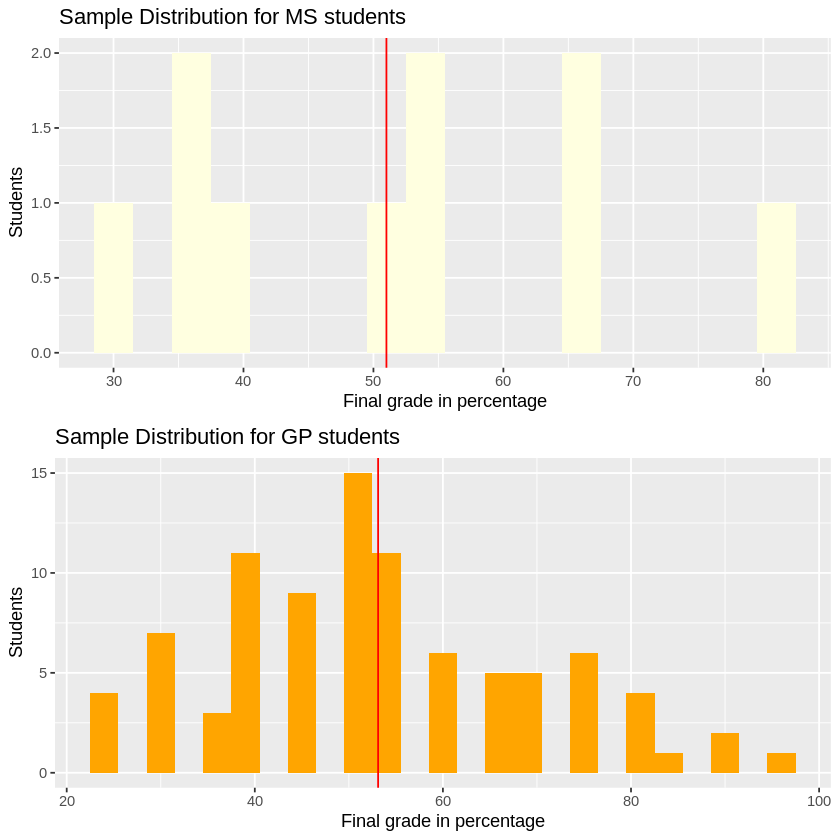

In [45]:
#Data set below rebinds all the observations which will be used for our hypothesis testing so that we can see the 
#effect of school variable on final grade by percent
total_observations_used <- rbind(students_with_support, students_without_support)

MS_students <- total_observations_used %>%
               filter(school == "MS")

GP_students <- total_observations_used %>%
               filter(school == "GP")

MS_students_stats <- MS_students %>%
                     summarize(mean = mean(final_grade_by_percent), median = median(final_grade_by_percent), sd = sd(final_grade_by_percent))

MS_mean <- MS_students_stats %>%
           pull(mean) %>%
           as.numeric()

MS_median <- MS_students_stats %>%
             pull(median) %>%
             as.numeric()

MS_sd <- MS_students_stats %>%
         pull(sd) %>%
         as.numeric()

GP_students_stats <- GP_students %>%
                     summarize(mean = mean(final_grade_by_percent), median = median(final_grade_by_percent), sd = sd(final_grade_by_percent))

GP_mean <- GP_students_stats %>%
           pull(mean) %>%
           as.numeric()

GP_median <- GP_students_stats %>%
             pull(median) %>%
             as.numeric()

GP_sd <- GP_students_stats %>%
         pull(sd) %>%
         as.numeric()

# Construct a table to compare their stats
sample_estimates_table_final_grade_by_percent_schools <- data.frame(samples = c("MP", "GP"),
                                                         mean = c(MS_mean, GP_mean),
                                                         median = c(MS_median, GP_median),
                                                         standard_deviation = c(MS_sd, GP_sd))
sample_estimates_table_final_grade_by_percent_schools

# Visualisation:
MS_students_plot <-  MS_students %>%
                     ggplot(aes(x = final_grade_by_percent)) +
                     geom_histogram(binwidth = 3, fill = "lightyellow") +
                     geom_vline(xintercept = MS_mean, colour = "red") +
                     xlab("Final grade in percentage") +
                     ylab("Students") +
                     ggtitle("Sample Distribution for MS students")

GP_students_plot <-  GP_students %>%
                     ggplot(aes(x = final_grade_by_percent)) +
                     geom_histogram(binwidth = 3, fill = "orange") +
                     geom_vline(xintercept = GP_mean, colour = "red") +
                     xlab("Final grade in percentage") +
                     ylab("Students") +
                     ggtitle("Sample Distribution for GP students")

plot_grid(MS_students_plot, GP_students_plot, ncol = 1)


#Thus we fliter this variable out because their sample distributions resemble each other & they have very similar average score

**Since the average of MS and GP students are similar, we decided to not filter out the school variable as their influence is insignificant.**

## Table of Statistics for Variables of Interest 
The code below provides tables containing mean, sd, median for variable final_grade_by_percent with respect to students with educational support and those without

In [46]:
#Sample estimates for variable: final_grade_by_percent
final_with_support_stats <- students_with_support %>%
                           summarize(mean = mean(final_grade_by_percent), median = median(final_grade_by_percent), sd = sd(final_grade_by_percent))

mean_final_with_support <- final_with_support_stats %>%
                           pull(mean) %>%
                           as.numeric()

median_final_with_support <- final_with_support_stats %>%
                             pull(median) %>%
                             as.numeric()

sd_final_with_support <- final_with_support_stats %>%
                         pull(sd) %>%
                         as.numeric()

final_without_support_stats <- students_without_support %>%
                           summarize(mean = mean(final_grade_by_percent), median = median(final_grade_by_percent), sd = sd(final_grade_by_percent))

mean_final_without_support <- final_without_support_stats %>%
                              pull(mean) %>%
                              as.numeric()

median_final_without_support <- final_without_support_stats %>%
                                pull(median) %>%
                                as.numeric()

sd_final_without_support <- final_without_support_stats %>%
                            pull(sd) %>%
                            as.numeric()

#Construct a table for sample estimates of population parameters:
sample_estimates_table_final_grade_by_percent <- data.frame(samples = c("students_with_support", "students_without_support"),
                                                            mean = c(mean_final_with_support, mean_final_without_support),
                                                            median = c(median_final_with_support, mean_final_without_support),
                                                            standard_deviation = c(sd_final_with_support, sd_final_without_support))
sample_estimates_table_final_grade_by_percent

samples,mean,median,standard_deviation
<chr>,<dbl>,<dbl>,<dbl>
students_with_support,48.1,50.0,12.77314
students_without_support,57.7,57.7,18.24465


## Hypothesis Test: Bootstrap Sampling & 95% Confidence Interval for final_grade_by_percent

**1. Null Hypothesis: The averages (mean) performance of students with financial aid and without financial aid are the same.**  
**2. Alternative Hypothesis: The averages (mean) performance of students with and without financial aid are statistically different.**

In [37]:
#Bootstrapping sampling: n here refers to the number of bootstrap samples we will take from the sample
n = 10000

#Bootstrap sampling distribution for students with financial aid
students_with_support_bootstrap_sample <- students_with_support %>%
                                          rep_sample_n(reps = n, size = nrow(students_with_support), replace = TRUE) %>%
                                          group_by(replicate) %>%
                                          summarize(mean = mean(final_grade_by_percent))

students_without_support_bootstrap_sample <- students_without_support %>%
                                          rep_sample_n(reps = n, size = nrow(students_with_support), replace = TRUE) %>%
                                          group_by(replicate) %>%
                                          summarize(mean = mean(final_grade_by_percent))

#Construct Confidence Interval:for students without financial support - Use 95% now
upper_quantile <- students_without_support_bootstrap_sample %>% 
                  pull(mean) %>% 
                  quantile(0.975)
upper_quantile

lower_quantile <- students_without_support_bootstrap_sample %>% 
                  pull(mean) %>% 
                  quantile(0.025)
lower_quantile

97.5% 
 62.7

2.5% 
52.7

## Sampling & Visualization for final_grade_by_percent

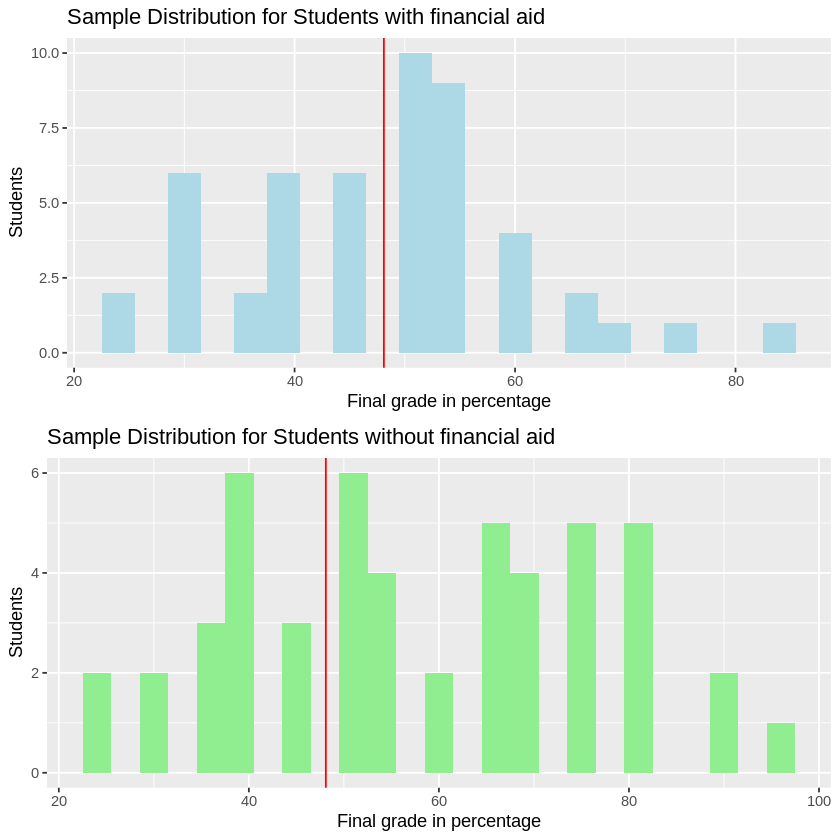

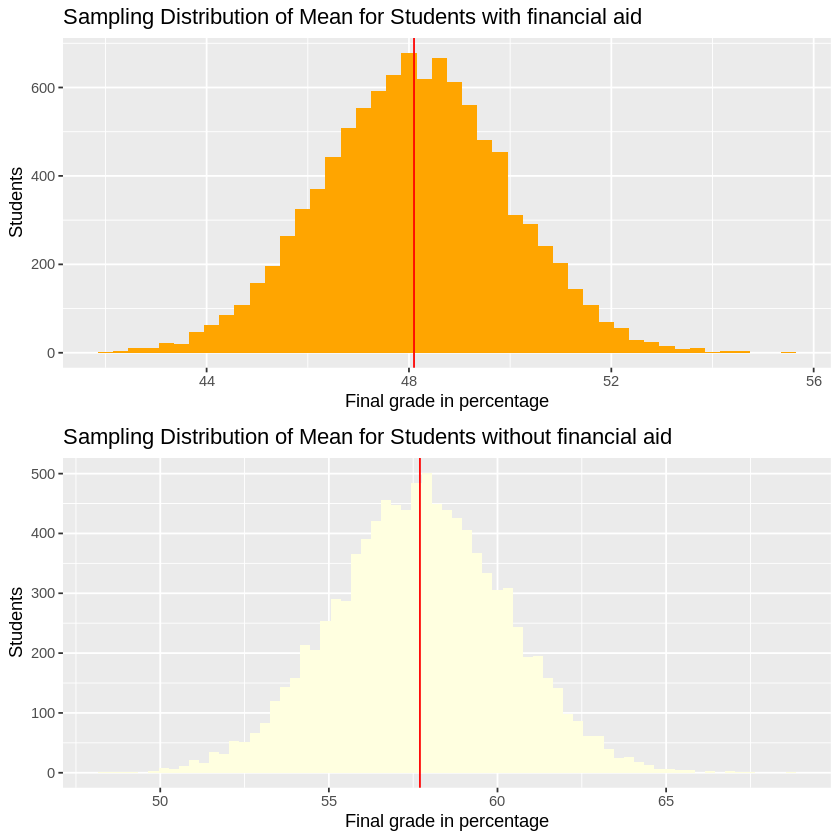

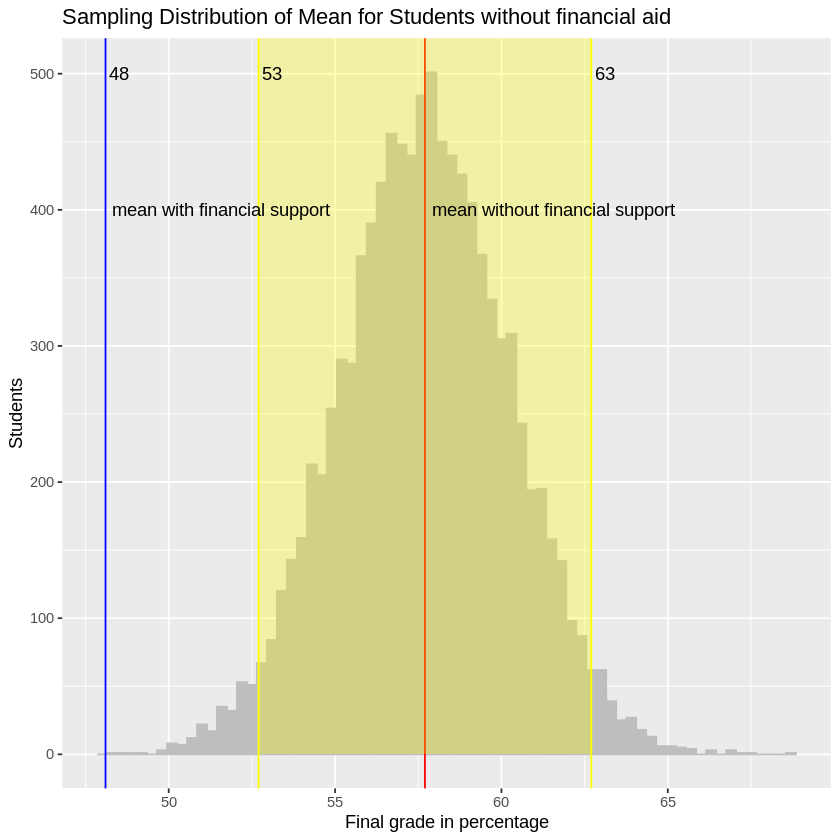

In [38]:
#Sample distribution:
student_with_support_plot <-  students_with_support %>%
                              ggplot(aes(x = final_grade_by_percent)) +
                              geom_histogram(binwidth = 3, fill = "lightblue") +
                              geom_vline(xintercept = mean_final_with_support, colour = "red") +
                              xlab("Final grade in percentage") +
                              ylab("Students") +
                              ggtitle("Sample Distribution for Students with financial aid")

student_without_support_plot <-  students_without_support %>%
                              ggplot(aes(x = final_grade_by_percent)) +
                              geom_histogram(binwidth = 3, fill = "lightgreen") +
                              geom_vline(xintercept = mean_final_with_support, colour = "red") +
                              xlab("Final grade in percentage") +
                              ylab("Students") +
                              ggtitle("Sample Distribution for Students without financial aid")

plot_grid(student_with_support_plot, student_without_support_plot, ncol = 1)

#Bootstrap sampling distribution visualisation:
students_with_support_boostraping_sampling_distribution_plot <- students_with_support_bootstrap_sample %>%
                                                                ggplot(aes(x = mean)) +
                                                                geom_histogram(binwidth = 0.3, fill = "orange") +
                                                                geom_vline(xintercept = mean_final_with_support, colour = "red") +
                                                                xlab("Final grade in percentage") +
                                                                ylab("Students") +
                                                                ggtitle("Sampling Distribution of Mean for Students with financial aid")

students_without_support_boostraping_sampling_distribution_plot <- students_without_support_bootstrap_sample %>%
                                                                ggplot(aes(x = mean)) +
                                                                geom_histogram(binwidth = 0.3, fill = "lightyellow") +
                                                                geom_vline(xintercept = mean_final_without_support, colour = "red") +
                                                                xlab("Final grade in percentage") +
                                                                ylab("Students") +
                                                                ggtitle("Sampling Distribution of Mean for Students without financial aid")

plot_grid(students_with_support_boostraping_sampling_distribution_plot, students_without_support_boostraping_sampling_distribution_plot, ncol = 1)

students_without_support_boostraping_sampling_distribution_plot_with_ci <- students_without_support_bootstrap_sample %>%
                                                                           ggplot(aes(x = mean)) +
                                                                           geom_histogram(binwidth = 0.3, color = "grey", fill = "grey") +
                                                                           geom_vline(xintercept = mean_final_without_support, colour = "red") +
                                                                           geom_vline(xintercept = mean_final_with_support, colour = "blue") +
                                                                           geom_vline(xintercept = upper_quantile, colour = "yellow") +
                                                                           geom_vline(xintercept = lower_quantile, colour = "yellow") +
                                                                           annotate("rect", xmin = lower_quantile, xmax = upper_quantile, ymin = 0, ymax = Inf,
                                                                                     fill = "yellow",
                                                                                     alpha = 0.3) +
                                                                           annotate("text", x = lower_quantile + 0.1, y = 500, hjust = 0,
                                                                                     label = paste(round(lower_quantile))) +
                                                                           annotate("text", x = upper_quantile + 0.1, y = 500, hjust = 0,
                                                                                     label = paste(round(upper_quantile))) +
                                                                           annotate("text", x = mean_final_with_support + 0.1, y = 500, hjust = 0,
                                                                                     label = paste(round(mean_final_with_support))) +
                                                                           annotate("text", x = mean_final_with_support + 0.2, y = 400, hjust = 0,
                                                                                     label = "mean with financial support") +
                                                                           annotate("text", x = mean_final_without_support + 0.2, y = 400, hjust = 0,
                                                                                     label = "mean without financial support") +
                                                                           xlab("Final grade in percentage") +
                                                                           ylab("Students") +
                                                                           ggtitle("Sampling Distribution of Mean for Students without financial aid")

students_without_support_boostraping_sampling_distribution_plot_with_ci
                                                            



# 4. Results:

From our project findings, we are hoping to find whether we can reject our null hypothesis, which is: The averages (mean) performance of students with financial aid and without financial aid are the same. Our preliminary analysis highlights that students with financial aid do significantly worse than students without financial aid: the mean grade for students with financial aid goes far left to the lower quantile (2.5%) of the confidence interval. 

Our findings will hopefully shed light on the debate in academic discourse of whether accessing financial aid has an effect on a student’s academic performance. It can lead to further research on the topic, such as whether there is a difference between accepting different types of financial aid (e.g. government loans or university bursaries) or the country of residence of the students, since our project was limited to Portugal.

# 5. References

Dynarski, S. (2019, September 6). Taking out a student loan is better than dropping out. The New York Times. https://www.nytimes.com/2019/09/06/business/student-loans-needed-community-colleges.html

Facer, E. (n.d.). Student loans, academic performance, and degree completion. https://www.weber.edu/wsuimages/goddard/ECON/research/Facer%20-%20Student%20Loans%2C%20Academic%20Performance%2C%20and%20Degree%20Completion.pdf

Huang, W., Li, F., Liao, X., & Hu, P. (2018). More money, better performance? The effects of student loans and need-based grants in China's higher education. China Economic Review, 51, 208-227. https://doi.org/10.1016/j.chieco.2017.09.005